
# Module 2: Classification (Supervised Learning)

**Learning Objectives**
- Explain supervised learning for classification and contrast it with regression.
- Understand logistic regression and decision tree criteria with clearly defined terms.
- Train and interpret Logistic Regression, Decision Tree, and Random Forest on a small dataset.
- Read diagnostics such as accuracy, classification report, predicted probabilities, and feature importances.



## Supervised Learning Recap

In **supervised learning**, we have inputs (features) and outputs (labels). The model learns a mapping from inputs to outputs from labeled examples. In **classification**, labels are **categorical** (e.g., species A, B, or C). In **regression**, labels are **numeric**.

We will work with the classic **Iris** dataset to build and interpret classification models.



## Logistic Regression: Model and Terms (Multiclass via Softmax)

For **binary classification**, logistic regression models the probability of the positive class with the **sigmoid**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad p(y=1 \mid x) = \sigma(\theta^\top x).
$$

**Terms**
- $x \in \mathbb{R}^d$: feature vector (input).
- $\theta \in \mathbb{R}^d$: (Theta) model parameters (weights) learned from data.
- $z = \theta^\top x$: linear score.
- $p(y=1 \mid x)$: predicted probability of class \(1\) given features \(x\).
- $\sigma(\cdot)$: sigmoid function mapping any real number to \([0,1]\).

**Decision rule (binary, with threshold \(\tau\))**
$$
\hat{y} = \mathbb{1}\!\left[p(y=1 \mid x) \ge \tau\right], \quad \text{commonly } \tau = 0.5.
$$

Parameters \(\theta\) are typically found by minimizing **log-loss** with regularization to reduce overfitting.


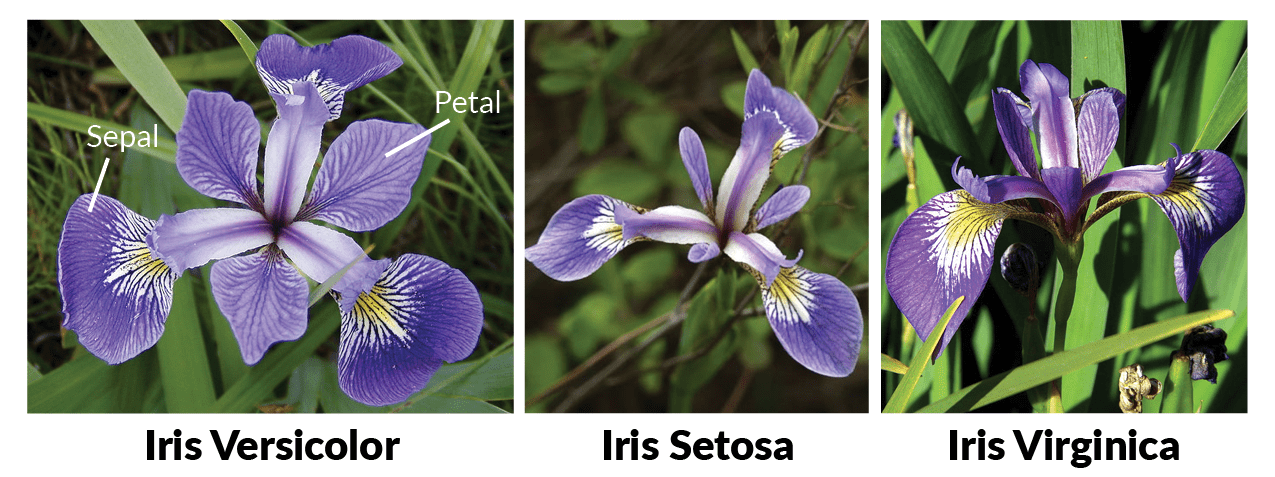

In [ ]:

# === Logistic Regression on Iris (multiclass) ===
# Purpose:
# - Show a clean pipeline: scaler + logistic regression.
# - Use a stratified split, read classification report, and inspect probabilities.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Stratified split keeps class proportions similar in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline: Standardize features + multinomial logistic regression
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42))
])

# Train
logreg_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = logreg_clf.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print("-------------------")
print(f"Accuracy: {acc_lr:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=target_names))

# Predicted probabilities for first 5 test examples
proba_lr = logreg_clf.predict_proba(X_test[:5])
print("Predicted probabilities for first 5 test samples:")
for i, probs in enumerate(proba_lr):
    pairs = [f"{target_names[j]}={probs[j]:.3f}" for j in range(len(target_names))]
    print(f"Sample {i}: " + ", ".join(pairs))


Logistic Regression
-------------------
Accuracy: 0.921

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Predicted probabilities for first 5 test samples:
Sample 0: setosa=0.985, versicolor=0.015, virginica=0.000
Sample 1: setosa=0.034, versicolor=0.621, virginica=0.345
Sample 2: setosa=0.045, versicolor=0.882, virginica=0.072
Sample 3: setosa=0.011, versicolor=0.916, virginica=0.073
Sample 4: setosa=0.968, versicolor=0.032, virginica=0.000


/opt/anaconda3/envs/PA-Venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



**Interpretation (Logistic Regression)**
- The classification report shows **precision**, **recall**, and **F1-score** per class.
- Predicted probabilities illustrate how the model distributes confidence across classes.
- Scaling helps the optimizer converge and makes coefficients more stable.



## Decision Trees: Splitting Criteria and Terms

A **decision tree** splits data recursively based on feature values to create purer subsets.

- **Entropy**:
$$
H(t) = -\sum_{i=1}^{C} p_i \log_2(p_i).
$$

- **Information Gain**:
$$
IG = H(\text{parent}) - \sum_{k} \frac{N_k}{N} H(\text{child}_k).
$$

- **Gini Impurity**:
$$
G(t) = 1 - \sum_{i=1}^{C} p_i^2.
$$

**Terms**
- \(p_i\): proportion of class \(i\) at node \(t\).
- \(C\): number of classes.
- \(N\): number of samples at the parent node; \(N_k\): number at child \(k\).

A good split **maximizes** information gain or **minimizes** impurity.


In [ ]:

# === Decision Tree Classifier (short demo) ===
# Purpose:
# - Show a single, interpretable tree.
# - Display accuracy and feature importances to see what the tree relies on.

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # limit depth to reduce overfitting
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree (max_depth=3)")
print("---------------------------")
print(f"Accuracy: {acc_dt:.3f}")

# Feature importances: contribution of each feature to the tree's splits
importances_dt = pd.Series(dt_clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
print(importances_dt)


Decision Tree (max_depth=3)
---------------------------
Accuracy: 0.895

Feature Importances:
petal length (cm)    0.950732
petal width (cm)     0.049268
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64



**Interpretation (Decision Tree)**
- A shallow tree is easier to interpret and less prone to overfitting.
- **Feature importances** summarize which features drove the splits.
- Trees do not require feature scaling.


In [ ]:

# === Random Forest Classifier ===
# Purpose:
# - Demonstrate an ensemble of trees that usually generalizes better than a single tree.
# - Print accuracy and feature importances for quick interpretation.

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest")
print("-------------")
print(f"Accuracy: {acc_rf:.3f}")

importances_rf = pd.Series(rf_clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("\nFeature Importances (RF):")
print(importances_rf)


Random Forest
-------------
Accuracy: 0.895

Feature Importances (RF):
petal length (cm)    0.455831
petal width (cm)     0.406808
sepal length (cm)    0.112132
sepal width (cm)     0.025229
dtype: float64



**Interpretation (Random Forest)**
- Ensembles average many trees and often improve test accuracy.
- On Iris, petal measurements typically carry strong signal for separating classes.


In [4]:

# === Baseline: DummyClassifier ===
# Purpose:
# - Provide a "floor" for performance. Any useful model should beat it.

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
acc_dummy = accuracy_score(y_test, y_pred_dummy)

compare_df = pd.DataFrame({
    "Model": ["Dummy(most_frequent)", "LogisticRegression", "DecisionTree(max_depth=3)", "RandomForest"],
    "Accuracy": [acc_dummy, acc_lr, acc_dt, acc_rf]
}).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Model Comparison (Accuracy)")
print(compare_df.to_string(index=False))


Model Comparison (Accuracy)
                    Model  Accuracy
       LogisticRegression  0.921053
DecisionTree(max_depth=3)  0.894737
             RandomForest  0.894737
     Dummy(most_frequent)  0.315789



## A Note on Pipelines and Scaling

- We combined **`StandardScaler`** and **`LogisticRegression`** in a **`Pipeline`** so preprocessing and model fit occur together.
- **Scaling is typically beneficial for linear models** and distance-based methods.
- **Trees and forests** do **not** require feature scaling; splits are threshold-based.



## Wrap-Up

- You trained and interpreted **Logistic Regression**, **Decision Tree**, and **Random Forest** on Iris.
- You examined **accuracy**, **classification reports**, **predicted probabilities**, and **feature importances**.
- A **dummy baseline** set a reference point for model performance.

**Next Module:** Model evaluation and optimization (metrics beyond accuracy, proper validation, cross-validation, and regularization).
